In [1]:
import matplotlib.pyplot as plt

import pandas as pd
plt.rcParams['figure.figsize'] = [15, 7]


In [2]:
from ipynb.fs.full.dataCollect import getData

df_og = getData()

df_og

,GEN MW,GEN CURRENT,GEN VOLTAGE,GEN RPM,MS PRESS AVG,MS TEMP,CV AVG OPN,Field Voltage,HP OUT FLOW,Field Current,Time
0,1.242188,0.0,0.0,0.0,0.0,36.21602,0.162546,1.5,144.062515,2.34375,2021-06-16T11:30:00Z
1,1.242188,0.0,0.0,0.0,0.0,37.496094,0.154581,1.25,144.0557,4.6875,2021-06-16T11:31:00Z
2,1.242188,0.0,0.0,0.0,0.0,40.43008,0.160562,1.25,144.040787,2.34375,2021-06-16T11:32:00Z
3,1.242188,0.0,0.0,0.0,0.0,47.66875,0.156632,1.25,144.044037,2.34375,2021-06-16T11:33:00Z
4,1.242188,0.0,0.0,0.0,0.0,45.91289,0.163606,1.0,153.623764,2.34375,2021-06-16T11:34:00Z
...,...,...,...,...,...,...,...,...,...,...,...
2876,747.6797,16743.5117,25.879849,2999.06787,246.568848,568.1508,23.891971,310.0,2241.757,3539.0625,2021-06-18T11:26:00Z
2877,751.59375,16729.8223,25.853302,2999.39746,246.678223,567.573059,24.306149,311.25,2231.02881,3536.71875,2021-06-18T11:27:00Z
2878,755.25,16975.4043,25.832525,3002.80322,245.967285,567.4145,25.153707,315.75,2196.05,3583.59375,2021-06-18T11:28:00Z
2879,758.3672,16889.418,25.858524,3003.023,243.458496,567.2106,25.308089,315.75,2157.5293,3600.0,2021-06-18T11:29:00Z


In [3]:
#print(len(df_og['GEN VOLTAGE']))
#print(type(df_og['GEN RPM'][1]))
print(df_og['GEN VOLTAGE'].max())
print(df_og['GEN RPM'].max())

#df_og['GEN VOLTAGE'] = (df_og['GEN VOLTAGE'] - df_og['GEN VOLTAGE'].min()) / (df_og['GEN VOLTAGE'].max() - df_og['GEN VOLTAGE'].min())

25.9675617
3013.89917


In [10]:
def normalize_dataframe(df_og):
    col_no = len(df_og.columns) - 1
    df_scaled = df_og.iloc[:, : col_no].copy()
    for column in df_scaled.columns:
        df_scaled[column] = (df_scaled[column] - df_scaled[column].min()) / (df_scaled[column].max() - df_scaled[column].min())
    
    df = df_scaled.assign( Time = df_og['Time'])
    
    return df 


In [11]:
df = normalize_dataframe(df_og)

df

,GEN MW,GEN CURRENT,GEN VOLTAGE,GEN RPM,MS PRESS AVG,MS TEMP,CV AVG OPN,Field Voltage,HP OUT FLOW,Field Current,Time
0,0.000309,0.0,0.0,0.0,0.0,0.0,0.00026,0.002379,0.004342,0.000651,2021-06-16T11:30:00Z
1,0.000309,0.0,0.0,0.0,0.0,0.002383,0.000182,0.001586,0.004338,0.001302,2021-06-16T11:31:00Z
2,0.000309,0.0,0.0,0.0,0.0,0.007844,0.000241,0.001586,0.004331,0.000651,2021-06-16T11:32:00Z
3,0.000309,0.0,0.0,0.0,0.0,0.021319,0.000202,0.001586,0.004333,0.000651,2021-06-16T11:33:00Z
4,0.000309,0.0,0.0,0.0,0.0,0.018051,0.000271,0.000793,0.008826,0.000651,2021-06-16T11:34:00Z
...,...,...,...,...,...,...,...,...,...,...,...
2876,0.985888,0.986339,0.996622,0.995079,0.999557,0.990194,0.235109,0.980967,0.988216,0.983073,2021-06-18T11:26:00Z
2877,0.991056,0.985533,0.9956,0.995188,1.0,0.989119,0.239208,0.984933,0.983185,0.982422,2021-06-18T11:27:00Z
2878,0.995884,1.0,0.9948,0.996318,0.997118,0.988824,0.247597,0.999207,0.966779,0.995443,2021-06-18T11:28:00Z
2879,1.0,0.994935,0.995801,0.996391,0.986948,0.988444,0.249124,0.999207,0.948711,1.0,2021-06-18T11:29:00Z


### <font color='black'>Generator Parameter during Startup</font>


<AxesSubplot:xlabel='Time'>

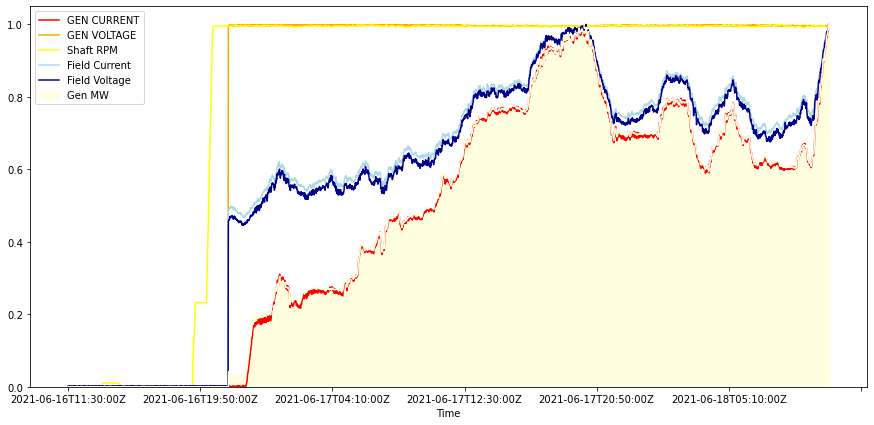

In [12]:
ax = df.plot('Time', 'GEN CURRENT' , label = 'GEN CURRENT', color="Red")
df.plot('Time', 'GEN VOLTAGE' , label = 'GEN VOLTAGE', ax =ax, color="Orange")
df.plot('Time' ,'GEN RPM', label = 'Shaft RPM', color="yellow", ax= ax)
df.plot('Time', 'Field Current' , label = 'Field Current', ax =ax, color="LightBlue")
df.plot('Time', 'Field Voltage' , label = 'Field Voltage', ax =ax, color="DarkBlue")
df.plot.area('Time' ,'GEN MW', label = 'Gen MW',  ax =ax, color="LightYellow")

### <font color='black'>Turbine Parameter during Startup</font>


<AxesSubplot:xlabel='Time'>

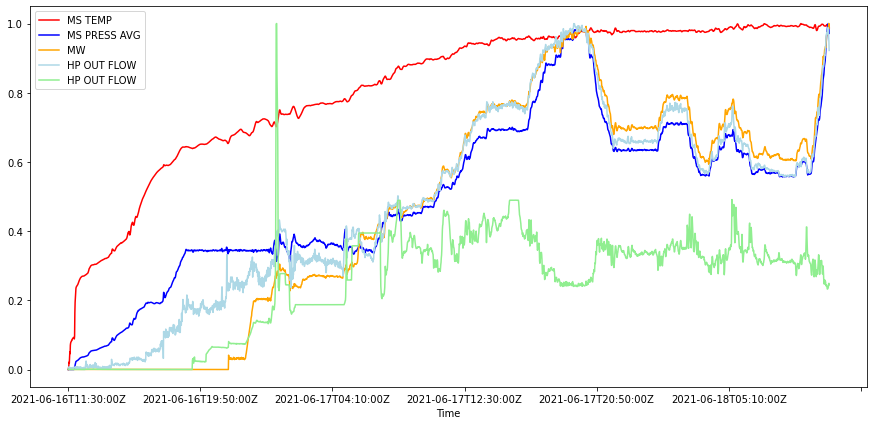

In [16]:
ax = df.plot('Time', 'MS TEMP' , label = 'MS TEMP', color="Red")
df.plot('Time', 'MS PRESS AVG' , label = 'MS PRESS AVG', ax =ax, color="Blue")
df.plot('Time' ,'GEN MW', label = 'MW', color="Orange", ax= ax)
df.plot('Time', 'HP OUT FLOW' , label = 'HP OUT FLOW', ax =ax, color="LightBlue")
df.plot('Time', 'CV AVG OPN' , label = 'HP OUT FLOW', ax =ax, color="LightGreen")


#### <font color='black'>Bearing Two Vibration at Increasing RPM</font>


<AxesSubplot:xlabel='Time'>

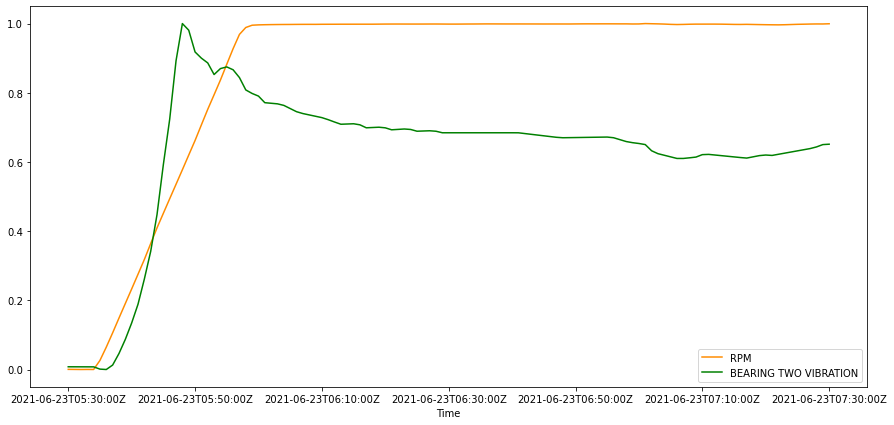

In [7]:
from ipynb.fs.full.dataCollect import getTurbineData

#In Unit 50

vib_data = getTurbineData()
df = normalize_dataframe(vib_data)
#print(vib_data)

ax = df.plot('Time' ,'RPM', label = 'RPM', color="DarkOrange")
df.plot('Time', 'TB VBR 2' , label = 'BEARING TWO VIBRATION', ax =ax, color="Green")